#### Importing libs

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sqlalchemy import create_engine
from wordcloud import WordCloud
import os

#### Set connection to database

In [2]:
engine = create_engine(f"""
                    postgresql://postgres:
                    {os.getenv('POSTGRES_PASSWORD')}@postgres-db:
                    {os.getenv('HOST')}/{os.getenv('POSTGRES_DB')}
                    """
                          )  # create engine
con = engine.connect()  # get connection to db

#### Top 10 films all time with up to +100.000 votes

In [3]:
pd.read_sql_query("""
SELECT 
    originaltitle, averagerating, numvotes, startyear
FROM 
    title_ratings, title_basics
WHERE 
    title_ratings.tconst = title_basics.tconst
AND
    numvotes > 100000
AND
    titletype = 'movie'
ORDER BY
    averagerating DESC
LIMIT 10
""",
                  con)

originaltitle  averagerating   numvotes  \
0                       The Shawshank Redemption            9.3  2672739.0   
1                                  The Godfather            9.2  1852380.0   
2                                   12 Angry Men            9.0   789457.0   
3  The Lord of the Rings: The Return of the King            9.0  1841943.0   
4                               Schindler's List            9.0  1353017.0   
5                          The Godfather Part II            9.0  1268313.0   
6                                The Dark Knight            9.0  2645624.0   
7                                   Pulp Fiction            8.9  2047849.0   
8                Il buono, il brutto, il cattivo            8.8   761289.0   
9                                   Forrest Gump            8.8  2072613.0   

  startyear  
0      1994  
1      1972  
2      1957  
3      2003  
4      1993  
5      1974  
6      2008  
7      1994  
8      1966  
9      1994

#### Top 10 series all time with up to +100.000 votes

In [4]:
pd.read_sql_query("""
SELECT 
    originaltitle, averagerating, numvotes, startyear
FROM 
    title_ratings, title_basics
WHERE 
    title_ratings.tconst = title_basics.tconst
AND
    numvotes > 100000
AND 
    titletype IN ('tvSeries','tvMiniSeries')
ORDER BY
    averagerating DESC
LIMIT 10
""",
                  con)

originaltitle  averagerating   numvotes startyear
0                     Planet Earth II            9.5   145481.0      2016
1                        Breaking Bad            9.5  1878940.0      2008
2                           Chernobyl            9.4   751006.0      2019
3                        Planet Earth            9.4   210088.0      2006
4                          The Heroes            9.4   166037.0      2008
5                    Band of Brothers            9.4   468722.0      2001
6          Avatar: The Last Airbender            9.3   315492.0      2005
7  Scam 1992: The Harshad Mehta Story            9.3   144596.0      2020
8         Cosmos: A Spacetime Odyssey            9.3   122292.0      2014
9                            The Wire            9.3   340370.0      2002

#### Top 10 videogames all time voted on IMBD - because of not many votes, only +10,000 votes

In [5]:
pd.read_sql_query("""
SELECT 
    originaltitle, averagerating, numvotes, startyear
FROM 
    title_ratings, title_basics
WHERE 
    title_ratings.tconst = title_basics.tconst
AND 
    titletype = 'videoGame'
AND
    numvotes > 10000
ORDER BY
    averagerating DESC
LIMIT 10
""",
                  con)

originaltitle  averagerating  numvotes startyear
0           Red Dead Redemption II            9.7   38924.0      2018
1            Wiedzmin 3: Dziki Gon            9.7   27409.0      2015
2                   The Last of Us            9.7   62947.0      2013
3                       God of War            9.6   29329.0      2018
4                 Metal Gear Solid            9.6   11943.0      1998
5               Grand Theft Auto V            9.5   61930.0      2013
6       Uncharted 4: A Thief's End            9.5   30099.0      2016
7              Red Dead Redemption            9.5   27222.0      2010
8  Metal Gear Solid 3: Snake Eater            9.5   10591.0      2004
9              Fainaru fantajî VII            9.5   10692.0      1997

#### Years by produced films/series

In [6]:
years_prod = pd.read_sql_query(r"""
SELECT 
    startyear, count(*) AS num_of_films
FROM 
    title_basics
WHERE 
    startyear != '\N'
AND 
    startyear < '2023'
GROUP BY
    startyear
ORDER BY
    startyear DESC
""",con)
years_prod

startyear  num_of_films
0        2022        344347
1        2021        440723
2        2020        389864
3        2019        415257
4        2018        425873
..        ...           ...
138      1882             2
139      1881             2
140      1878             2
141      1877             4
142      1874             1

[143 rows x 2 columns]

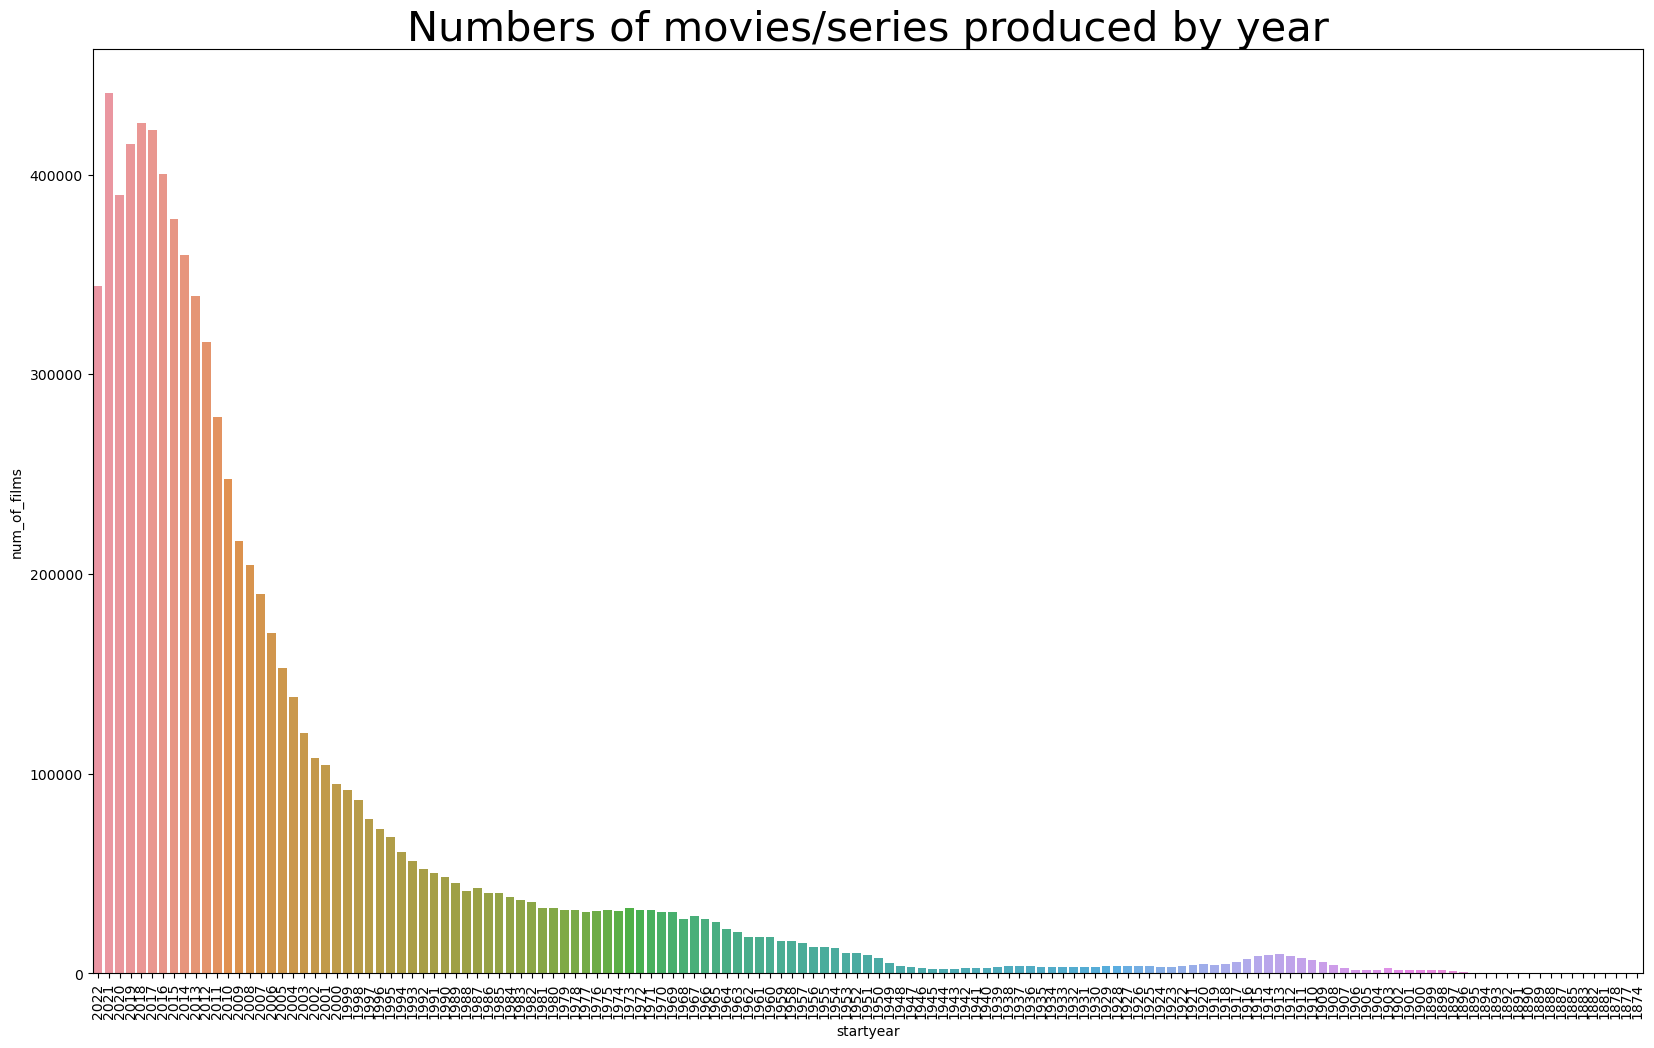

In [7]:
plt.figure(figsize=(20, 12))
plt.title('Numbers of movies/series produced by year',fontsize=30)
sns.barplot(data=years_prod, x='startyear', y='num_of_films')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

#### Top film by each year

In [8]:
top_by_year = pd.read_sql_query(r"""
SELECT 
    originaltitle, averagerating, numvotes, startyear
FROM 
    title_ratings, title_basics
WHERE 
    title_ratings.tconst = title_basics.tconst
AND 
    startyear != '\N'
AND
    titletype = 'movie'
ORDER BY
    startyear ASC, (averagerating*numvotes) DESC
""",con)
top_by_year = top_by_year.drop_duplicates(subset=['startyear'])

In [9]:
top_by_year.reset_index(drop=True)

originaltitle  averagerating  \
0                                           Miss Jerry            5.3   
1                        The Corbett-Fitzsimmons Fight            5.2   
2                             Jeffries-Sharkey Contest            3.9   
3                   The Republican National Convention            5.9   
4    Jeffries and Ruhlin Sparring Contest at San Fr...            4.3   
..                                                 ...            ...   
121                             Avengers: Infinity War            8.4   
122                                              Joker            8.4   
123                                              Tenet            7.3   
124                            Spider-Man: No Way Home            8.3   
125                                         The Batman            7.8   

      numvotes startyear  
0        200.0      1894  
1        460.0      1897  
2         67.0      1899  
3         40.0      1900  
4         36.0      1901  
..         ...       ...  
121  1077139.0      2018  
122  1277854.0      2019  
123   503744.0      2020  
124   750804.0      2021  
125   635968.0      2022  

[126 rows x 4 columns]

#### Wordcloud for top film in each year, fontsize depends on num of votes

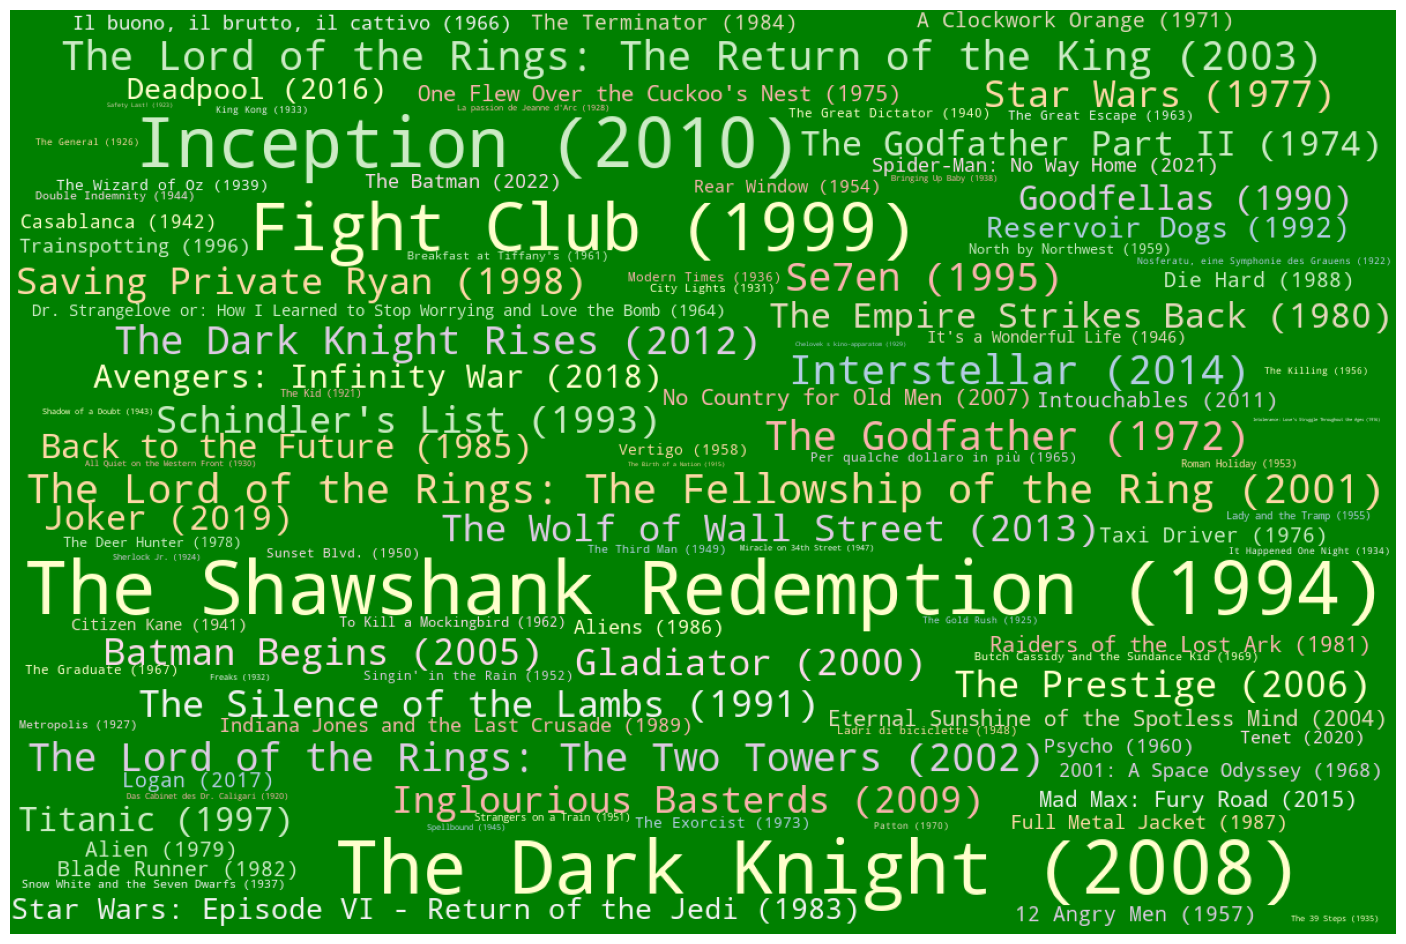

In [10]:
plt.figure(figsize=(20, 12))
# create new column with title and year of prod
top_by_year['title_year'] = top_by_year.originaltitle + ' (' + top_by_year.startyear +')' 
d = dict(zip(top_by_year.title_year,top_by_year.numvotes))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Top 10 movies genres

In [11]:
top_genres = pd.read_sql_query(r"""
SELECT 
    genres, count(*) as occuurency
FROM 
    title_basics
WHERE 
    startyear != '\N'
AND
    titletype = 'movie'
AND
    genres != '\N'
GROUP BY
    genres
ORDER BY
    occuurency DESC
""",
                  con)
top_genres.head(10)

genres  occuurency
0           Drama       99720
1     Documentary       84348
2          Comedy       37308
3   Drama,Romance       12073
4    Comedy,Drama       11631
5          Action       10130
6          Horror        9947
7        Thriller        7713
8           Adult        6960
9  Comedy,Romance        6446

#### Wordcloud for movie top genres, fontsize depends on num of votes

In [12]:
# Splitting multi genre rows 
d = {}
for gen,occ in zip(top_genres.genres,top_genres.occuurency):
    gen = gen.split(',')
    for g in gen:
        if g not in d.keys():
            d[g] = occ
        else:
            d[g] += occ
pd.Series(d)

Drama           199790
Documentary     111103
Comedy           94283
Romance          42793
Action           42795
Horror           26305
Thriller         31054
Adult             8883
Crime            32098
Western           7296
Music            12210
Adventure        23313
Biography        14283
Family           15435
War               8304
Animation         7220
Musical           9383
History          12380
Sci-Fi            8905
Mystery          14270
Fantasy          11876
Sport             6161
Film-Noir          884
News              1376
Reality-TV         448
Talk-Show          151
Short               52
Game-Show           14
Experimental         1
dtype: int64

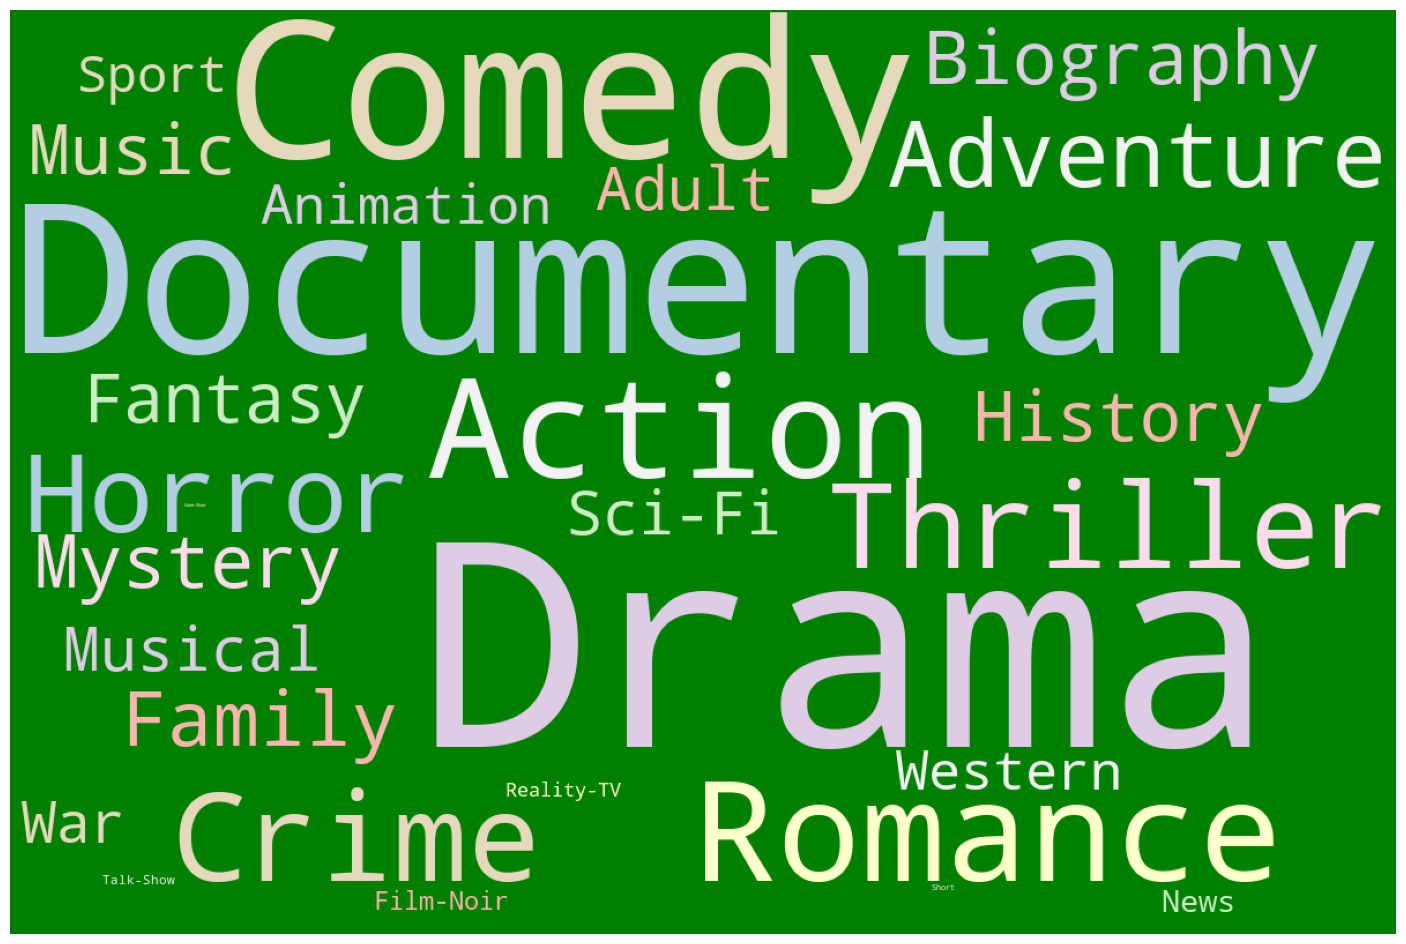

In [13]:
plt.figure(figsize=(20, 12))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Top genres by movie with 7+stars movies (+100,000 votes)

In [14]:
plus_7_genres = pd.read_sql_query(r"""
SELECT 
    genres, count(*) as occuurency
FROM 
    title_ratings, title_basics
WHERE
    titletype = 'movie'
AND
    genres != '\N'
AND 
    title_ratings.tconst = title_basics.tconst
AND
    numvotes > 100000
AND
        averagerating > 7
GROUP BY
    genres
ORDER BY
    occuurency DESC
""",
                  con)
plus_7_genres

genres  occuurency
0                         Drama          54
1    Adventure,Animation,Comedy          54
2          Comedy,Drama,Romance          42
3                 Drama,Romance          39
4       Action,Adventure,Sci-Fi          38
..                          ...         ...
200       Horror,Mystery,Sci-Fi           1
201               Horror,Sci-Fi           1
202      Horror,Sci-Fi,Thriller           1
203    Mystery,Romance,Thriller           1
204     Mystery,Sci-Fi,Thriller           1

[205 rows x 2 columns]

In [15]:
# Splitting multi genre rows 
d = {}
for gen,occ in zip(plus_7_genres.genres,plus_7_genres.occuurency):
    gen = gen.split(',')
    for g in gen:
        if g not in d.keys():
            d[g] = occ
        else:
            d[g] += occ
plus_7_genres = pd.DataFrame({'occurency':d.values()}, index=d.keys())

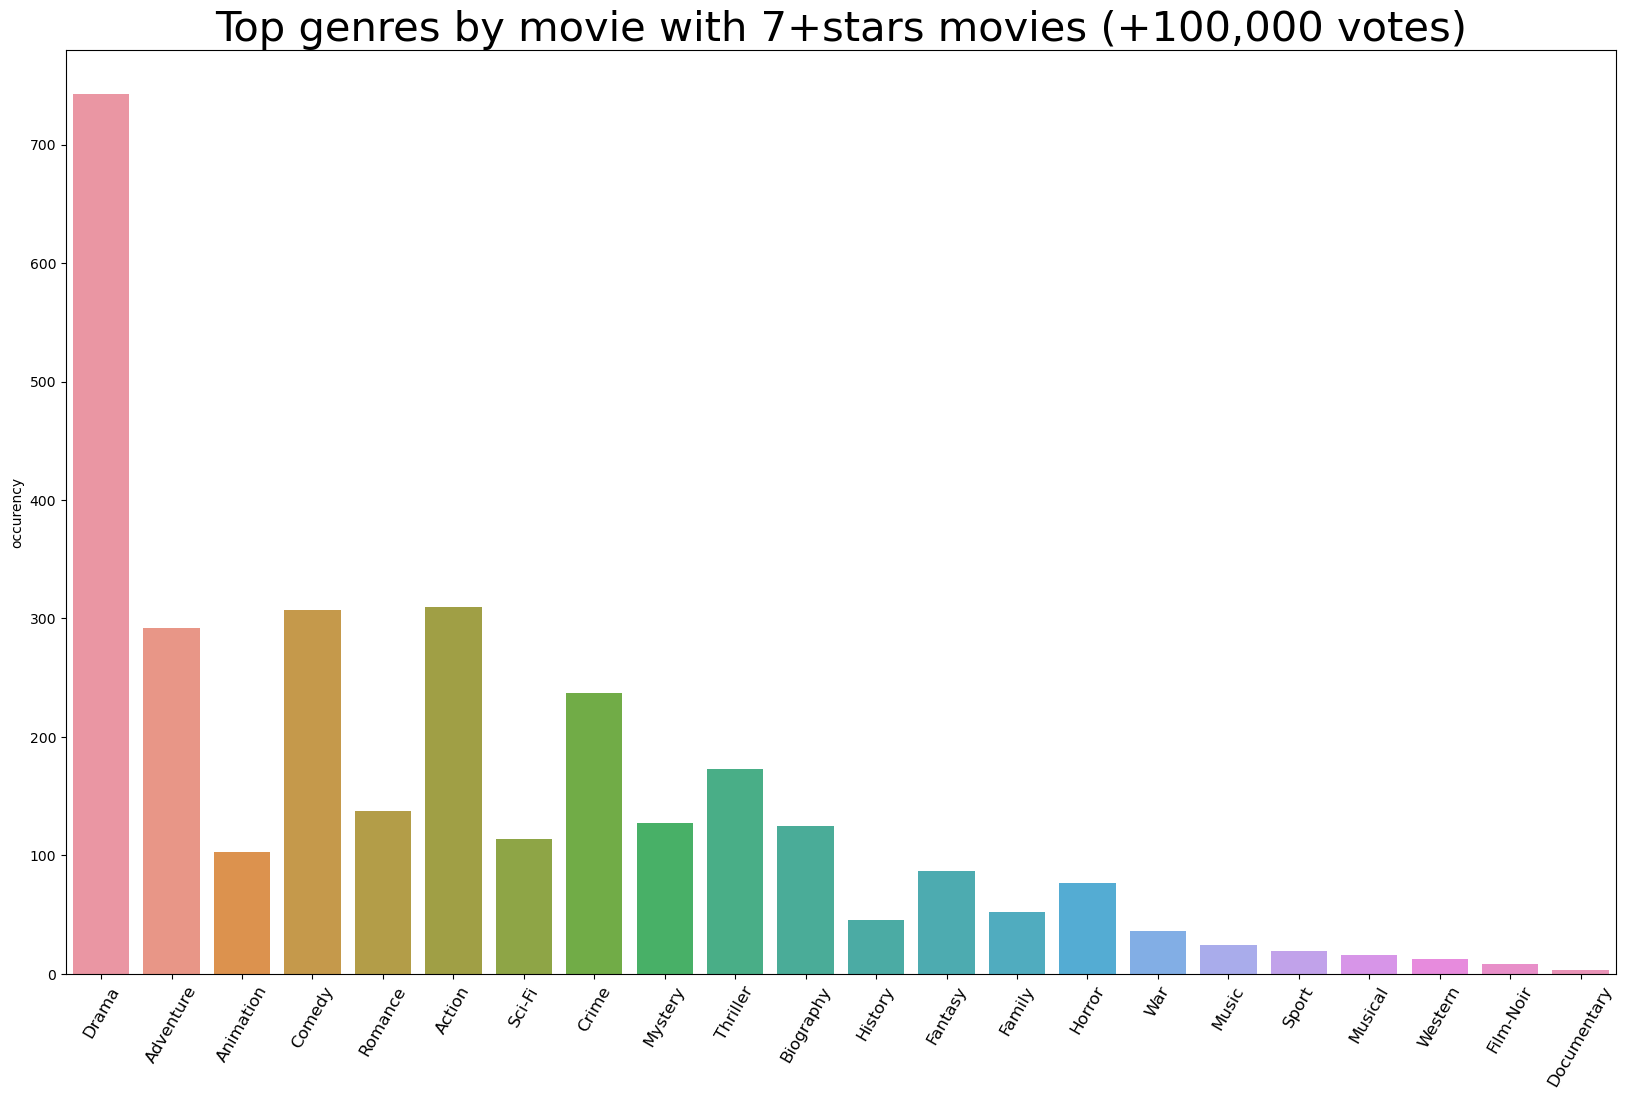

In [16]:
plt.figure(figsize=(20, 12))
plt.title('Top genres by movie with 7+stars movies (+100,000 votes)',fontsize=30)
sns.barplot(data=plus_7_genres.head(15),x=plus_7_genres.index, y=plus_7_genres.occurency)
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60, size = 12)
plt.show()

#### Top 10 series genres

In [17]:
top_series_genres = pd.read_sql_query(r"""
SELECT 
    genres, count(*) as occuurency
FROM 
    title_basics
WHERE 
    startyear != '\N'
AND
    titletype IN ('tvSeries','tvMiniSeries')
AND
    genres != '\N'
GROUP BY
    genres
ORDER BY
    occuurency DESC
""",
                  con)
top_series_genres.head(10)

genres  occuurency
0       Comedy       37072
1  Documentary       28014
2        Drama       22365
3   Reality-TV       17167
4    Talk-Show       15835
5       Family        6998
6         News        5497
7        Music        5300
8        Sport        4946
9    Game-Show        4943

#### Wordcloud for movie top genres, fontsize depends on num of votes

In [18]:
# Splitting multi genre rows 
d_s = {}
for gen,occ in zip(top_series_genres.genres,top_series_genres.occuurency):
    gen = gen.split(',')
    for g in gen:
        if g not in d_s.keys():
            d_s[g] = occ
        else:
            d_s[g] += occ
pd.Series(d_s)

Comedy         60531
Documentary    36637
Drama          46306
Reality-TV     22308
Talk-Show      21316
Family         15799
News            8100
Music          10277
Sport           7853
Game-Show       8157
Animation      15282
Romance        11132
Crime           9913
Adventure       9954
Adult           2446
Action          9929
History         5838
Sci-Fi          4053
Horror          4232
Thriller        4215
Short           4837
Mystery         5413
Biography       3024
Fantasy         5207
Musical         1654
War             1183
Western          399
Film-Noir          1
dtype: int64

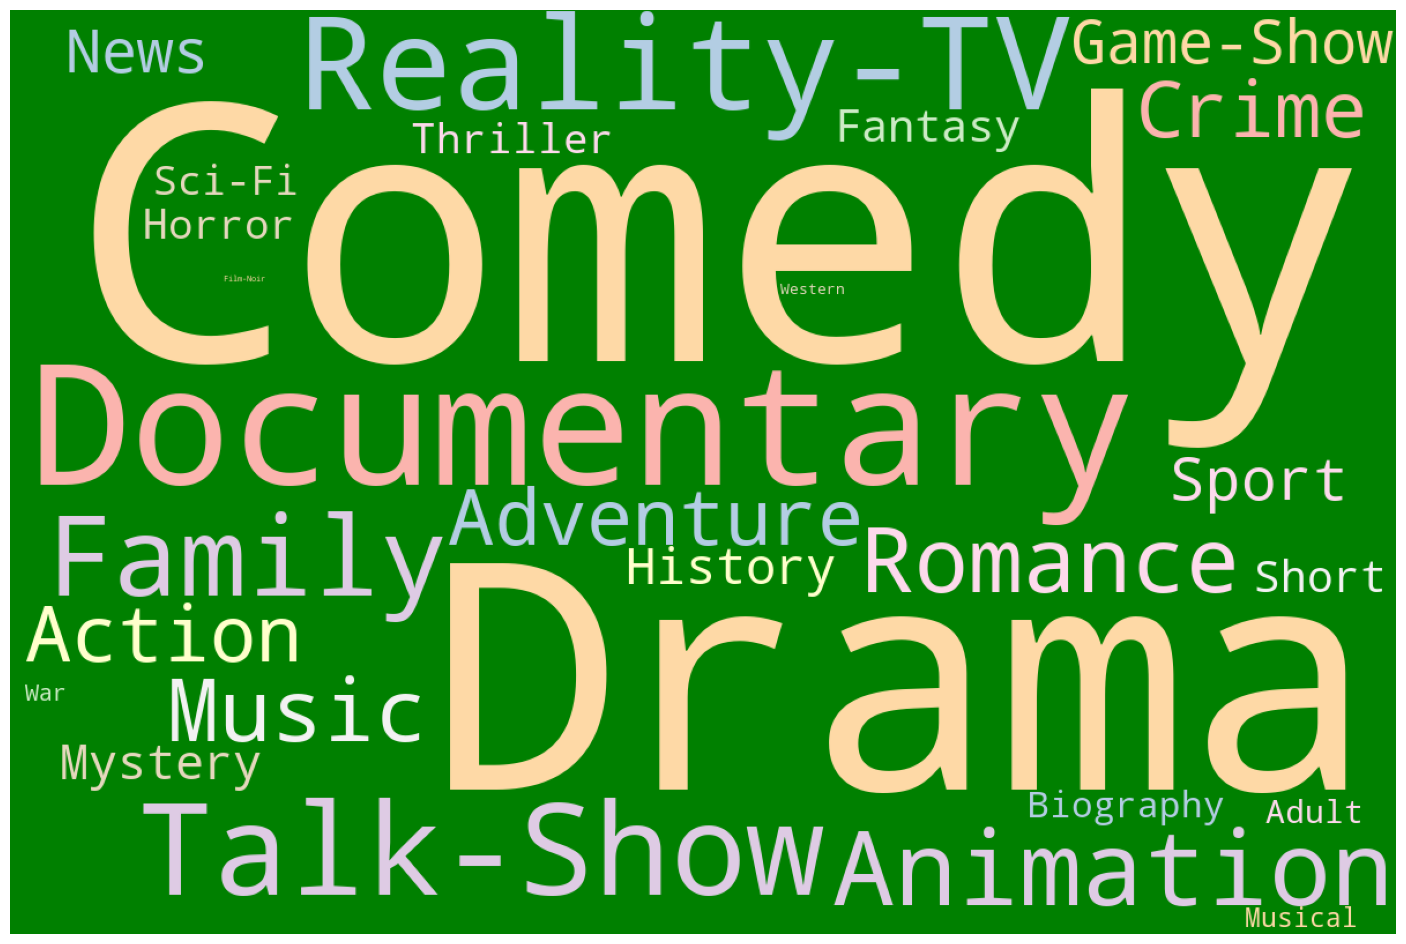

In [19]:
plt.figure(figsize=(20, 12))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d_s)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Top movie directors

In [20]:
top_directors = pd.read_sql_query(r"""
SELECT primaryname, COUNT(*) AS num_of_7_plus_movies 
FROM (
    SELECT
        originaltitle, averagerating, numvotes, startyear, primaryname
    FROM 
        name_basics, title_principals, title_ratings, title_basics
    WHERE 
        category = 'director'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 100000
    AND
        averagerating > 7
    ORDER BY
        averagerating DESC
) AS plus_7_movies
GROUP BY
    primaryname
ORDER BY
    num_of_7_plus_movies DESC
""",
                  con)

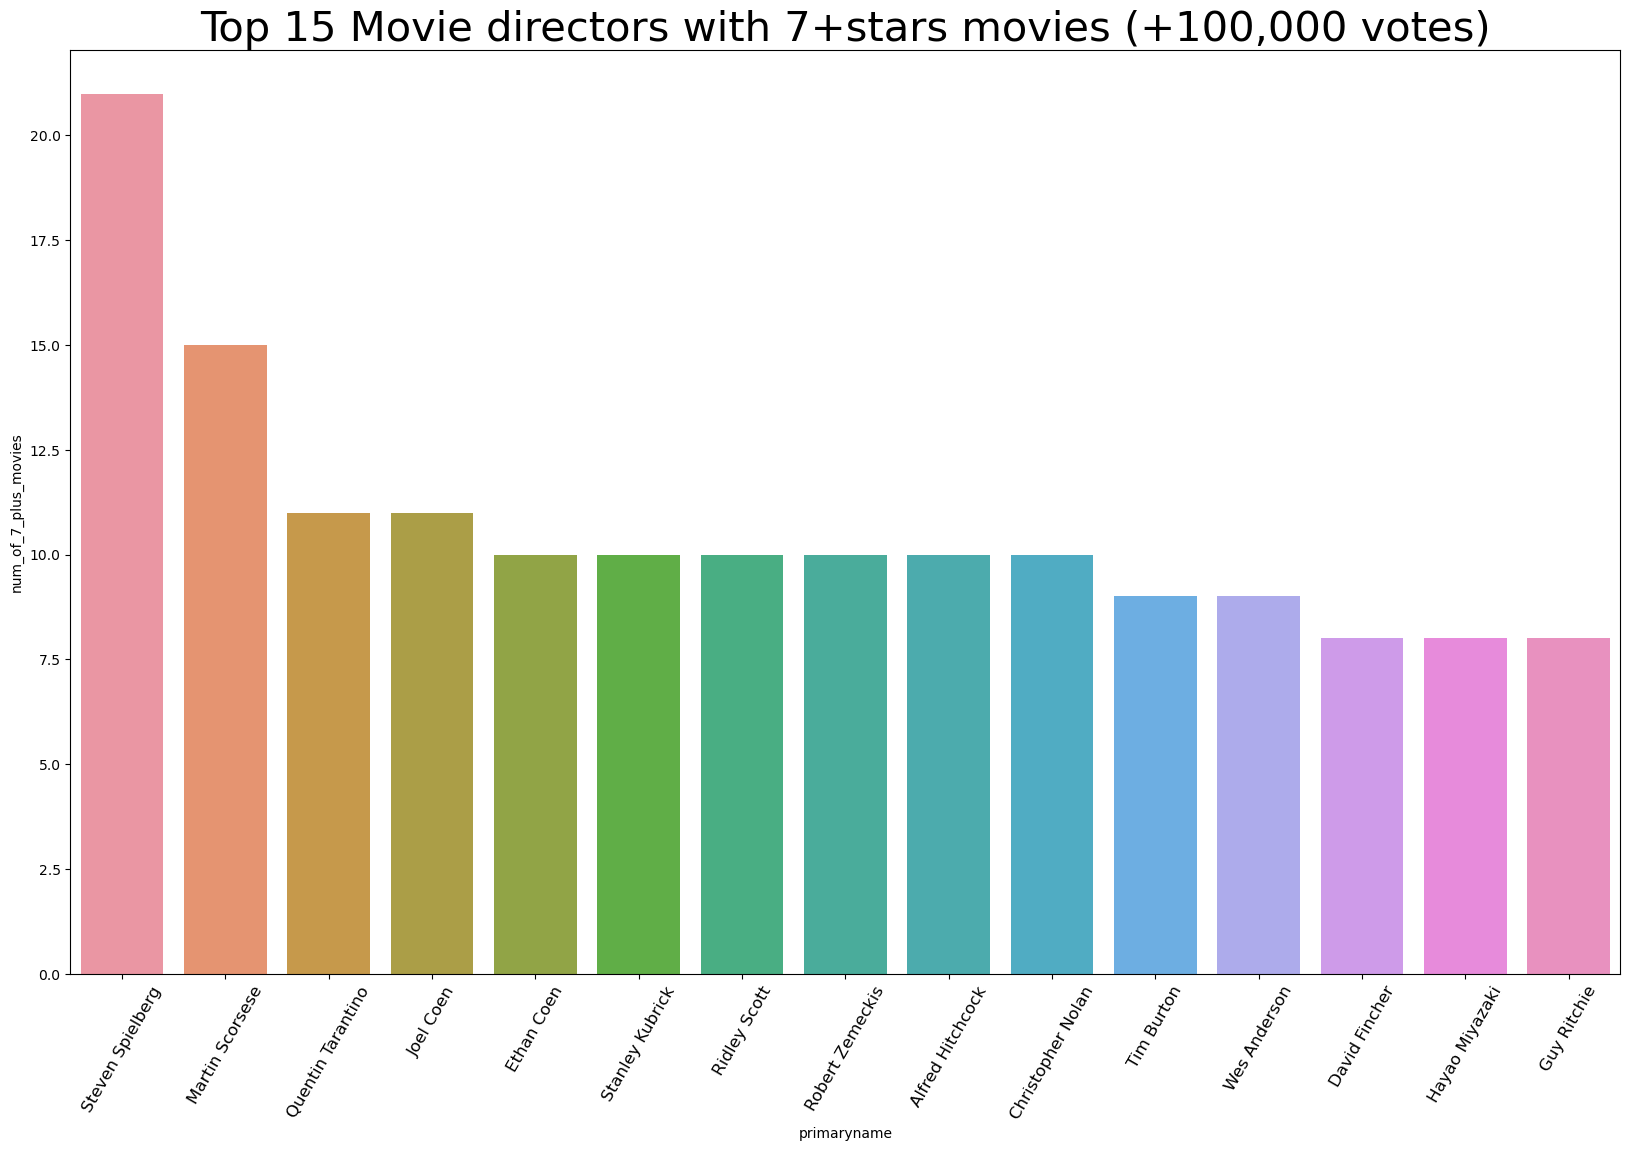

In [21]:
plt.figure(figsize=(20, 12))
plt.title('Top 15 Movie directors with 7+stars movies (+100,000 votes)',fontsize=30)
sns.barplot(data=top_directors.head(15), x='primaryname', y='num_of_7_plus_movies')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60, size = 12)
plt.show()

#### Best film for each of Top 15 directors 

In [22]:
top_15_dir = tuple(top_directors.head(15).primaryname) # create top directors tuple to sql query

In [23]:
best_film_by_dir = pd.read_sql_query(f"""
SELECT 
    originaltitle, primaryname, averagerating
FROM 
    name_basics, title_principals, title_ratings, title_basics
WHERE 
        category = 'director'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 100000
    AND
        averagerating > 7
    AND
        primaryname IN {top_15_dir}
ORDER BY
    (averagerating*numvotes) DESC
""",con)

In [24]:
best_film_by_dir.drop_duplicates(subset=['primaryname']).reset_index(drop=True)

originaltitle        primaryname  averagerating
0                 The Dark Knight  Christopher Nolan            9.0
1                      Fight Club      David Fincher            8.8
2                    Forrest Gump    Robert Zemeckis            8.8
3                    Pulp Fiction  Quentin Tarantino            8.9
4                       Gladiator       Ridley Scott            8.5
5                Schindler's List   Steven Spielberg            9.0
6         The Wolf of Wall Street    Martin Scorsese            8.2
7                     The Shining    Stanley Kubrick            8.4
8          No Country for Old Men          Joel Coen            8.2
9          No Country for Old Men         Ethan Coen            8.2
10                         Snatch        Guy Ritchie            8.2
11  Sen to Chihiro no kamikakushi     Hayao Miyazaki            8.6
12       The Grand Budapest Hotel       Wes Anderson            8.1
13                         Psycho   Alfred Hitchcock            8.5
14            Edward Scissorhands         Tim Burton            7.9

#### Wordcloud for top movie directors with +7 stars and over 100,000+ votes, fontsize depends on num of movies 

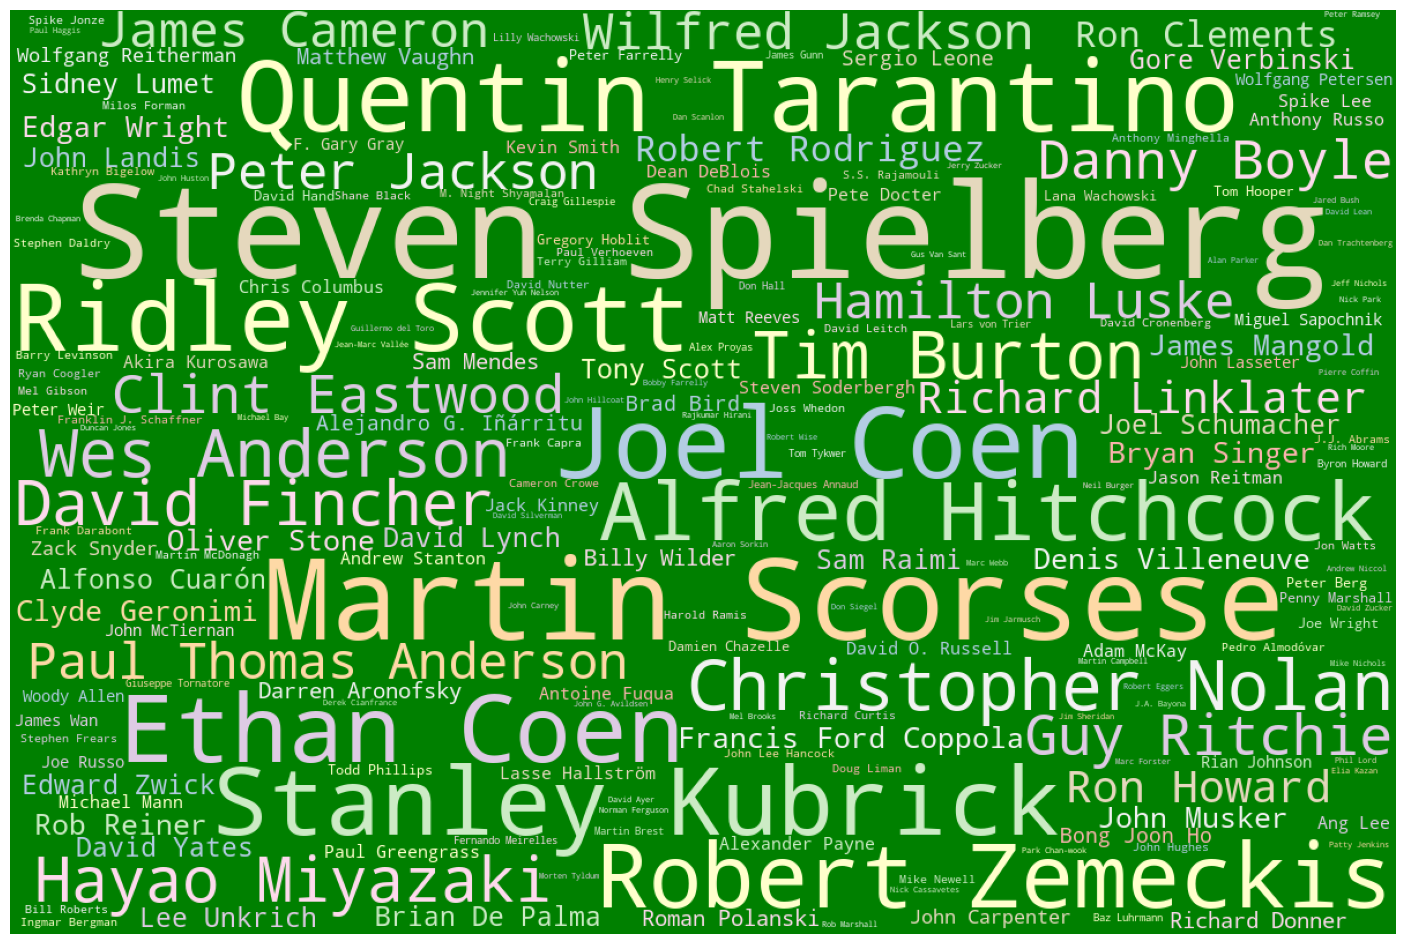

In [25]:
plt.figure(figsize=(20, 12))
d = dict(zip(top_directors.primaryname,top_directors.num_of_7_plus_movies))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### The top 15 worst directors - under 4 stars and over 20,000 votes

In [26]:
worst_directors = pd.read_sql_query(r"""
SELECT primaryname, COUNT(*) AS under_4_stars_movies 
FROM (
    SELECT
        originaltitle, averagerating, numvotes, startyear, primaryname
    FROM 
        name_basics, title_principals, title_ratings, title_basics
    WHERE 
        category = 'director'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 20000
    AND
        averagerating < 4
    ORDER BY
        averagerating DESC
) AS under_4
GROUP BY
    primaryname
ORDER BY
    under_4_stars_movies DESC
""",
                  con)

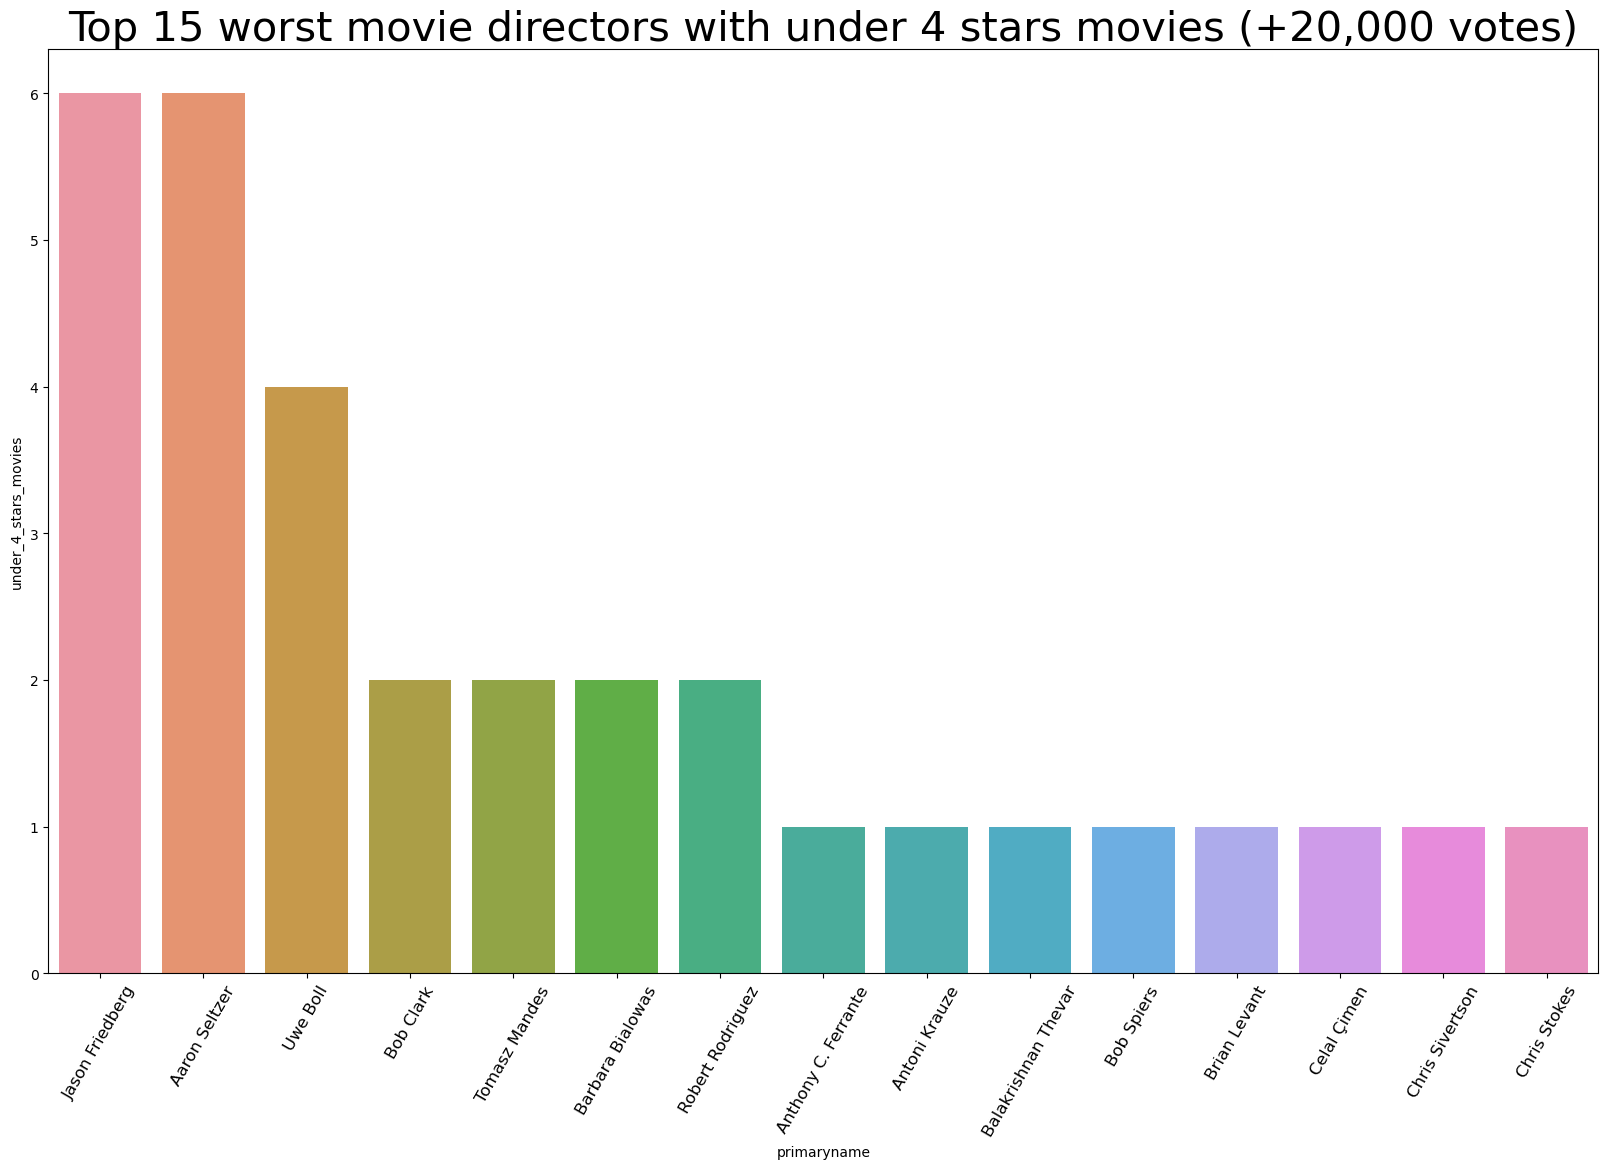

In [27]:
plt.figure(figsize=(20, 12))
plt.title('Top 15 worst movie directors with under 4 stars movies (+20,000 votes)',fontsize=30)
sns.barplot(data=worst_directors.head(15), x='primaryname', y='under_4_stars_movies')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60, size = 12)
plt.show()

#### Top actors

In [28]:
top_actors = pd.read_sql_query(r"""
SELECT primaryname, COUNT(*) AS num_of_7_plus_movies 
FROM (
    SELECT
        originaltitle, averagerating, numvotes, startyear, primaryname
    FROM 
        name_basics, title_principals, title_ratings, title_basics
    WHERE 
        category = 'actor'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 100000
    AND
        averagerating > 7
    ORDER BY
        averagerating DESC
) AS plus_7_movies
GROUP BY
    primaryname
ORDER BY
    num_of_7_plus_movies DESC
""",
                  con)

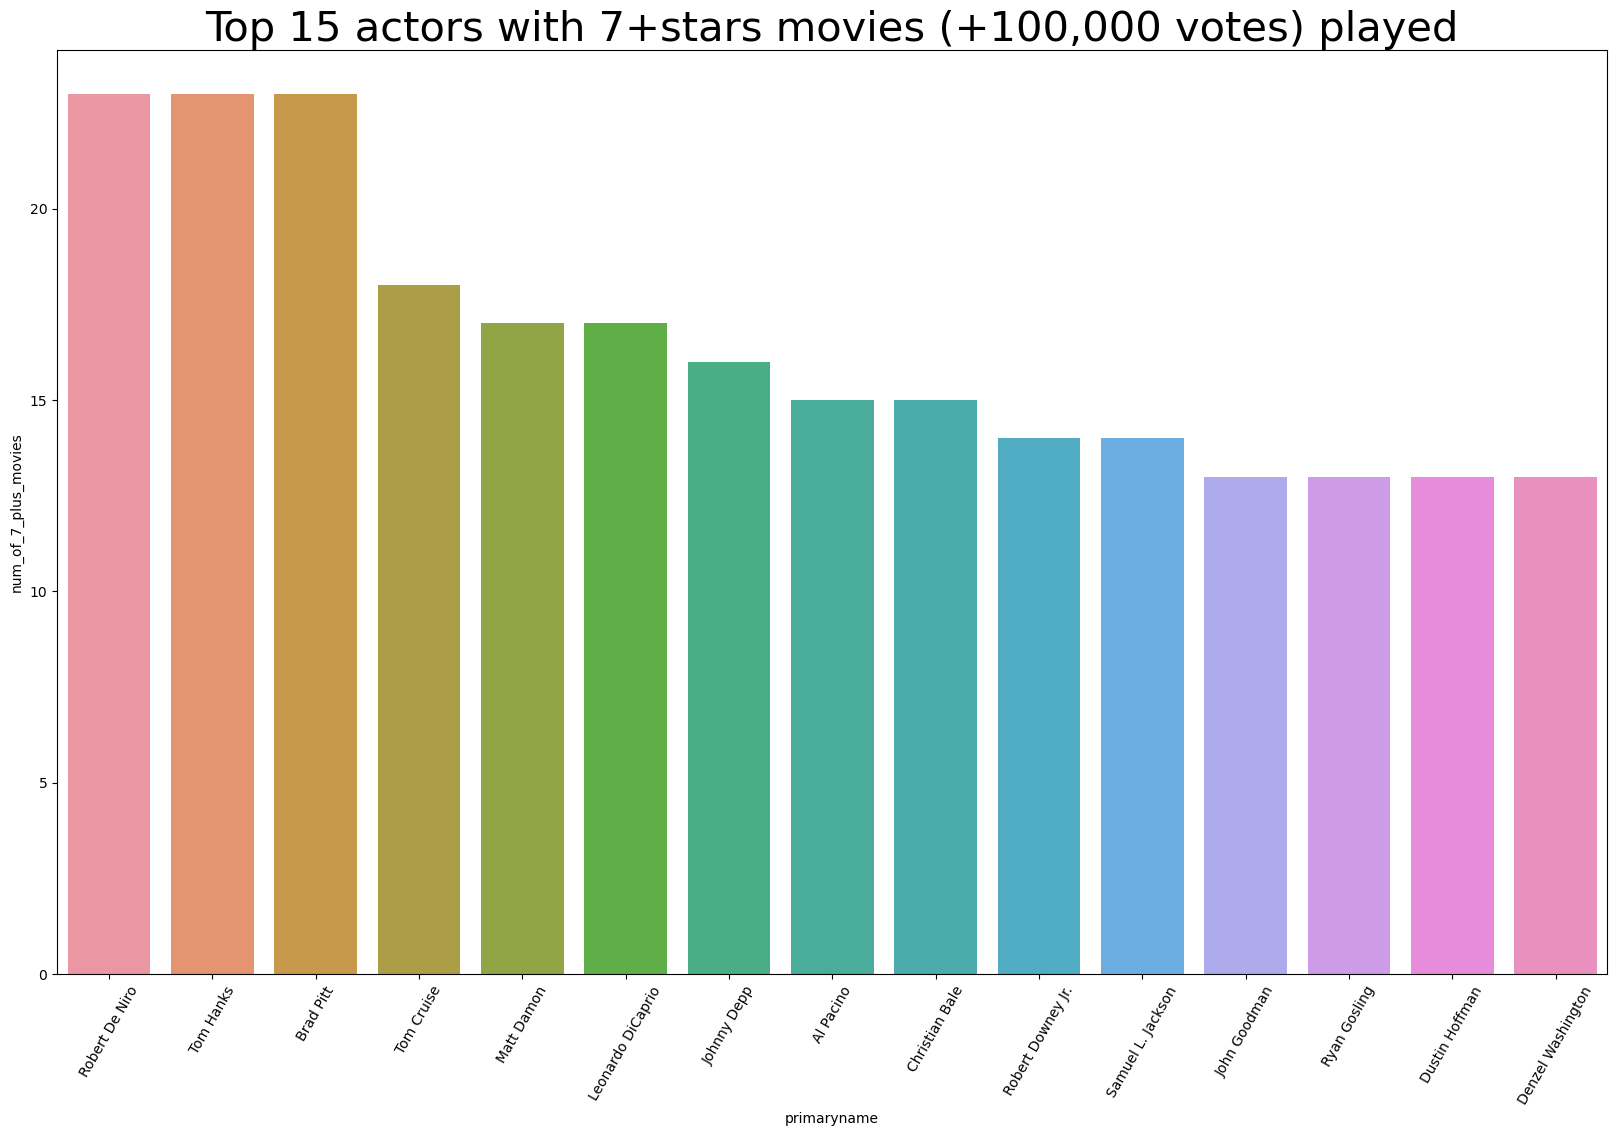

In [29]:
plt.figure(figsize=(20, 12))
plt.title('Top 15 actors with 7+stars movies (+100,000 votes) played',fontsize=30)
sns.barplot(data=top_actors.head(15), x='primaryname', y='num_of_7_plus_movies')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60)
plt.show()

#### Best film for top 15 actors to played in

In [30]:
top_15_act = tuple(top_actors.head(15).primaryname) # create top directors tuple to sql query

In [31]:
best_film_by_actor = pd.read_sql_query(f"""
SELECT 
    originaltitle, primaryname, averagerating
FROM 
    name_basics, title_principals, title_ratings, title_basics
WHERE 
        category = 'actor'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 100000
    AND
        averagerating > 7
    AND
        primaryname IN {top_15_act}
ORDER BY
    (averagerating*numvotes) DESC
""",con)

In [32]:
best_film_by_actor.drop_duplicates(subset=['primaryname']).reset_index(drop=True)

originaltitle        primaryname  \
0                                     The Dark Knight     Christian Bale   
1                                           Inception  Leonardo DiCaprio   
2                                          Fight Club          Brad Pitt   
3                                        Forrest Gump          Tom Hanks   
4                                        Pulp Fiction  Samuel L. Jackson   
5                                       The Godfather          Al Pacino   
6                                 Saving Private Ryan         Matt Damon   
7                               The Godfather Part II     Robert De Niro   
8                                        The Avengers  Robert Downey Jr.   
9   Pirates of the Caribbean: The Curse of the Bla...        Johnny Depp   
10                                     Monsters, Inc.       John Goodman   
11                                   Edge of Tomorrow         Tom Cruise   
12                                              Drive       Ryan Gosling   
13                                           Rain Man     Dustin Hoffman   
14                                       Training Day  Denzel Washington   

    averagerating  
0             9.0  
1             8.8  
2             8.8  
3             8.8  
4             8.9  
5             9.2  
6             8.6  
7             9.0  
8             8.0  
9             8.1  
10            8.1  
11            7.9  
12            7.8  
13            8.0  
14            7.7

#### Wordcloud for top actors with +7 stars and over 100,000+ votes played, fontsize depends on num of movies 

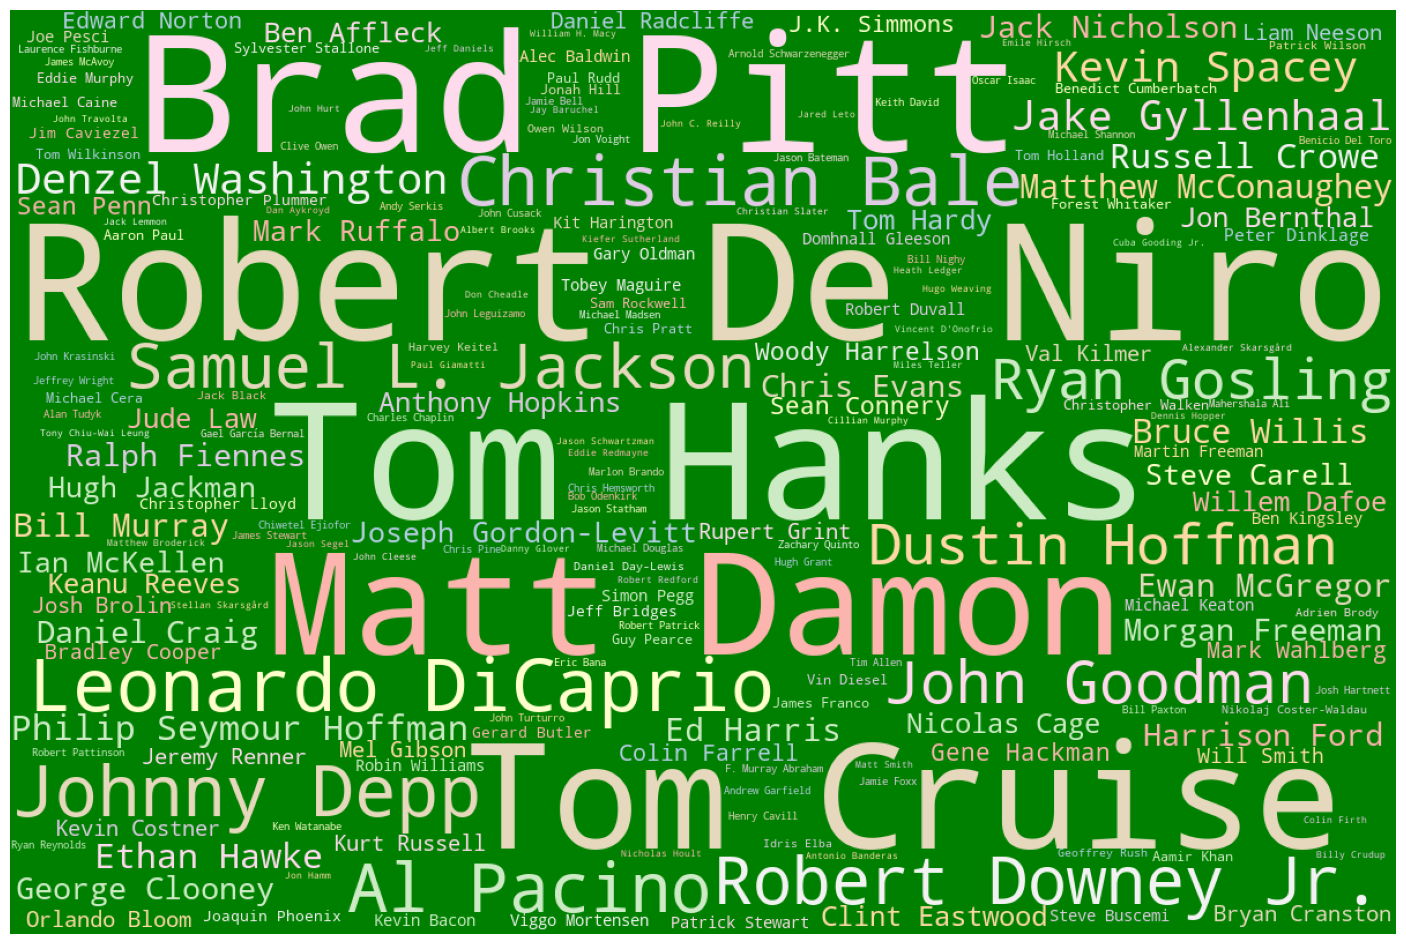

In [33]:
plt.figure(figsize=(20, 12))
d = dict(zip(top_actors.primaryname,top_actors.num_of_7_plus_movies))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### The worst 15 actors to played in under 4 stars movies and over 20,000 votes

In [34]:
worst_actors = pd.read_sql_query(r"""
SELECT primaryname, COUNT(*) AS under_4_stars_movies 
FROM (
    SELECT
        originaltitle, averagerating, numvotes, startyear, primaryname
    FROM 
        name_basics, title_principals, title_ratings, title_basics
    WHERE 
        category = 'actor'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 20000
    AND
        averagerating < 4
    ORDER BY
        averagerating DESC
) AS under_4
GROUP BY
    primaryname
ORDER BY
    under_4_stars_movies DESC
""",
                  con)

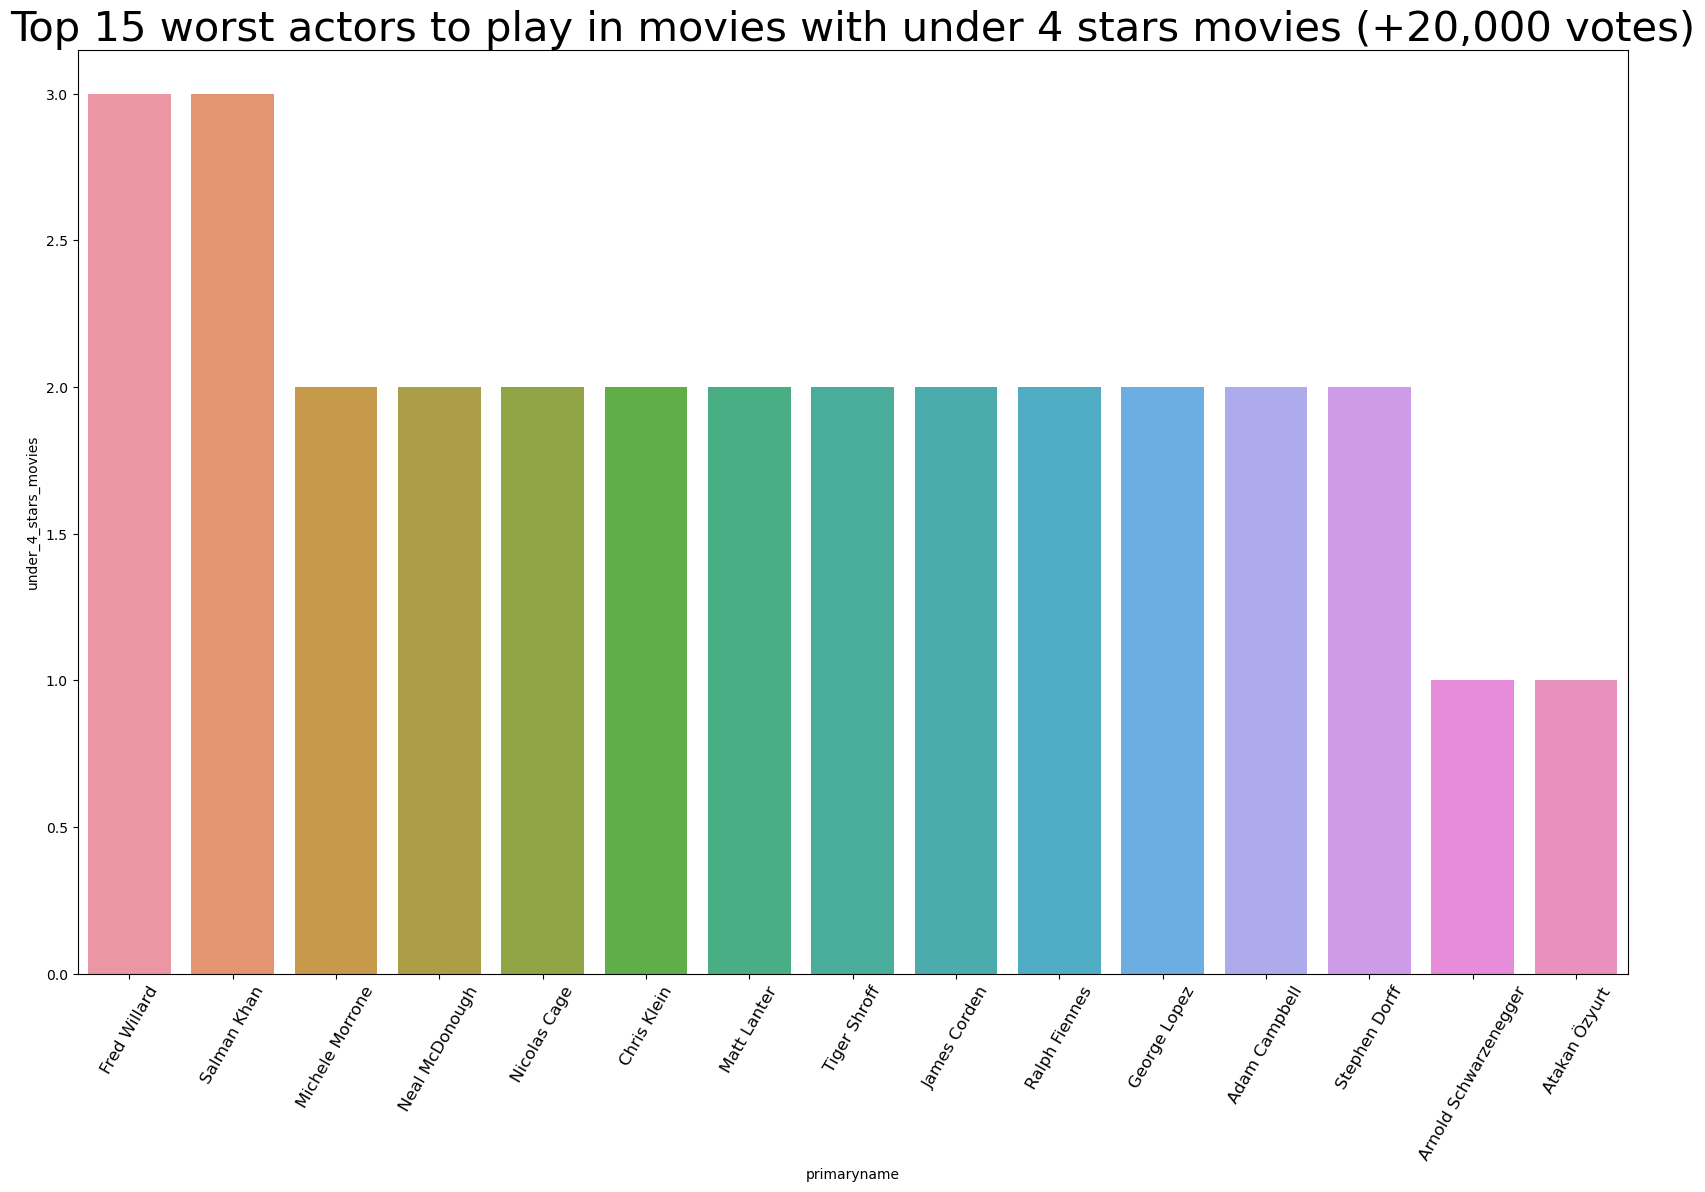

In [35]:
plt.figure(figsize=(20, 12))
plt.title('Top 15 worst actors to play in movies with under 4 stars movies (+20,000 votes)',fontsize=30)
sns.barplot(data=worst_actors.head(15), x='primaryname', y='under_4_stars_movies')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60, size = 12)
plt.show()

#### Top movie music composers

In [36]:
top_composers = pd.read_sql_query(r"""
SELECT primaryname, COUNT(*) AS num_of_7_plus_movies 
FROM (
    SELECT
        originaltitle, averagerating, numvotes, startyear, primaryname
    FROM 
        name_basics, title_principals, title_ratings, title_basics
    WHERE 
        category = 'composer'
    AND 
        title_ratings.tconst = title_basics.tconst
    AND 
        title_basics.tconst = title_principals.tconst
    AND
        name_basics.nconst = title_principals.nconst
    AND
        numvotes > 100000
    AND
        averagerating > 7
    ORDER BY
        averagerating DESC
) AS plus_7_movies
GROUP BY
    primaryname
ORDER BY
    num_of_7_plus_movies DESC
""",
                  con)

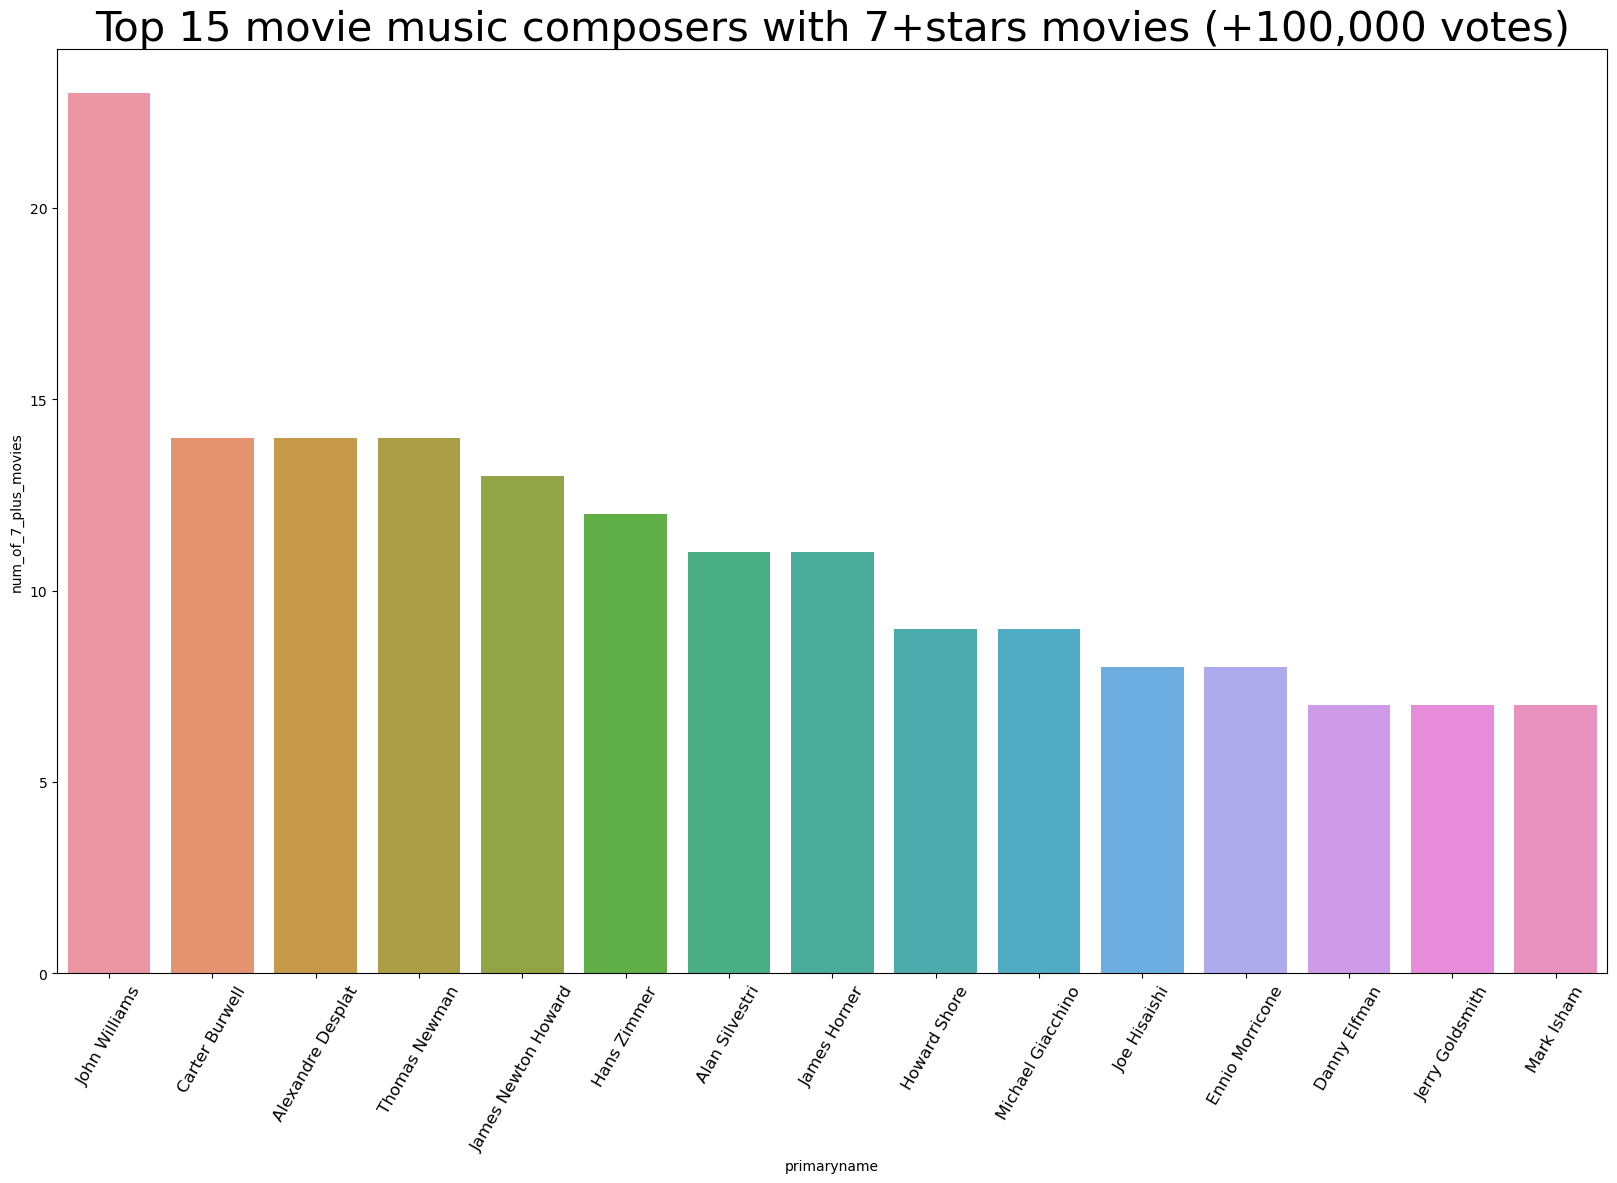

In [37]:
plt.figure(figsize=(20, 12))
plt.title('Top 15 movie music composers with 7+stars movies (+100,000 votes)',fontsize=30)
sns.barplot(data=top_composers.head(15), x='primaryname', y='num_of_7_plus_movies')
#plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=60, size = 12)
plt.show()

#### Wordcloud for top movie music composers with +7 stars and over 100,000+ votes played, fontsize depends on num of movies 

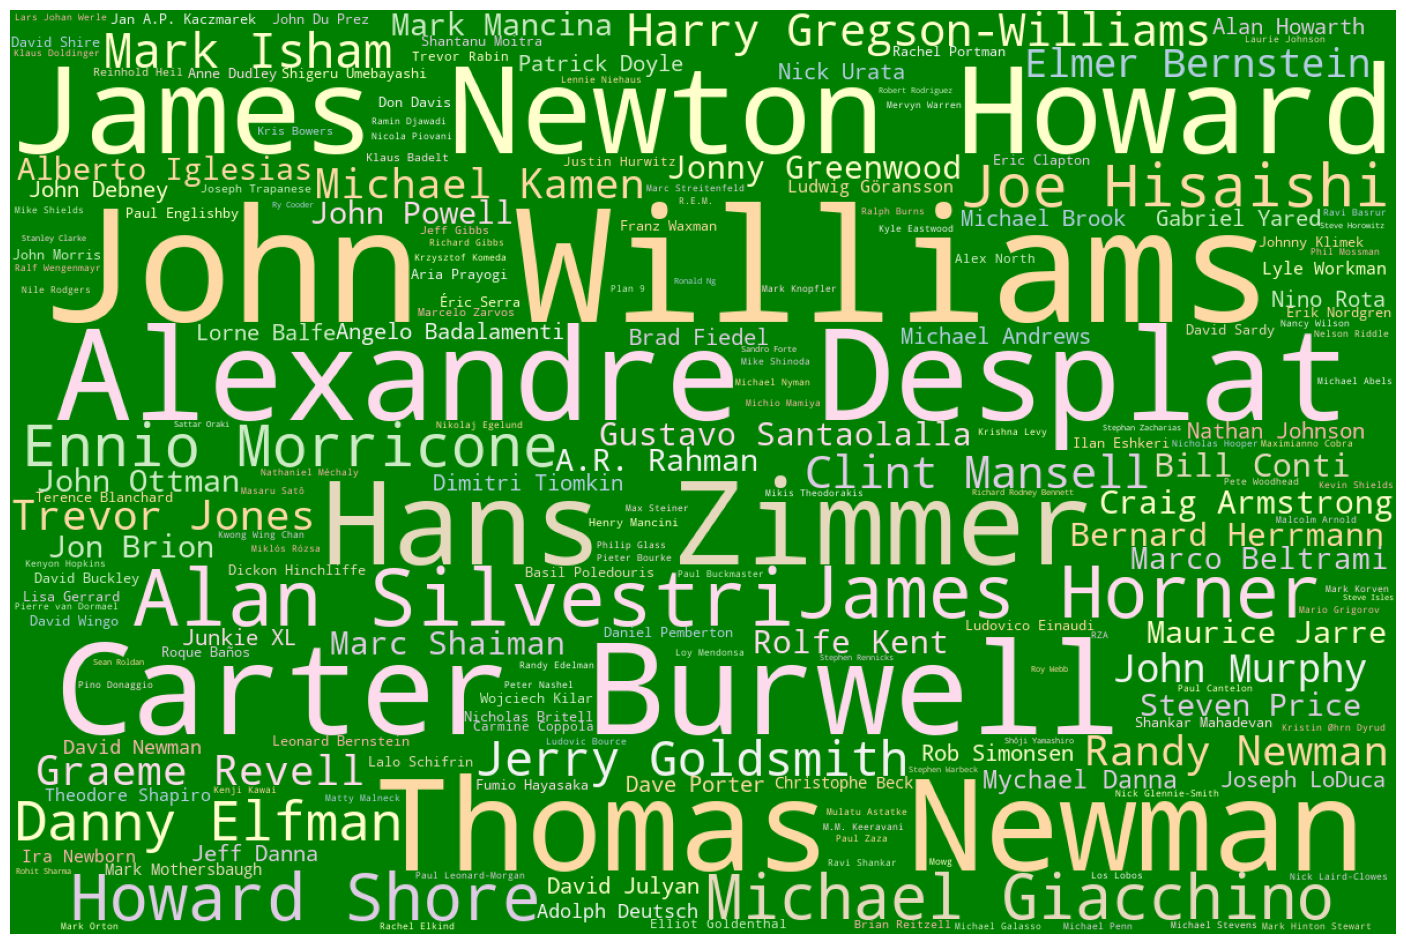

In [38]:
plt.figure(figsize=(20, 12))
d = dict(zip(top_composers.primaryname,top_composers.num_of_7_plus_movies))
wordcloud = WordCloud(width=1200, height=800, background_color='green', colormap='Pastel1', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### How many +18 movies and series

In [39]:
plus_18 = pd.read_sql_query("""
SELECT 
    isadult, COUNT(*) as number
FROM 
    title_basics
WHERE
    titletype IN ('tvSeries','tvMiniSeries', 'movie')
GROUP BY
    isadult
;
    """
                  , con)

In [40]:
plus_18.isadult = plus_18.isadult.apply(lambda x: 'yes' if x == '1' else 'no')
plus_18

isadult  number
0      no  900292
1     yes   12048

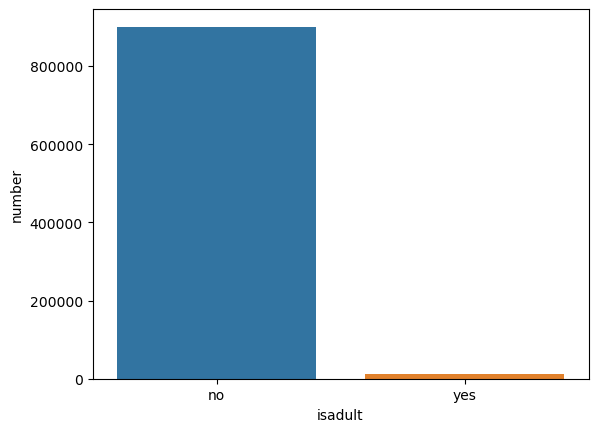

In [41]:
sns.barplot(data=plus_18, x='isadult', y='number')
plt.show()